<a href="https://colab.research.google.com/github/ByteXBit/HeartStrokePrediction/blob/main/HeartStroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0          Urban             228.69  36.600000  formerly smoked       1   
1          Rural             202.21  29.672853     never smoked       1   
2          Rural             105.92  32.500000     never smoked       1   
3          Urban             171.23  34.400000           smokes       1   
4          Rural             174.12  24.000000     never smoked       1   

  age_group  
0  Old Aged  
1  Old Aged  
2  Old Aged  
3    Adults  
4  Old Aged  


male -> 0
female-> 1:


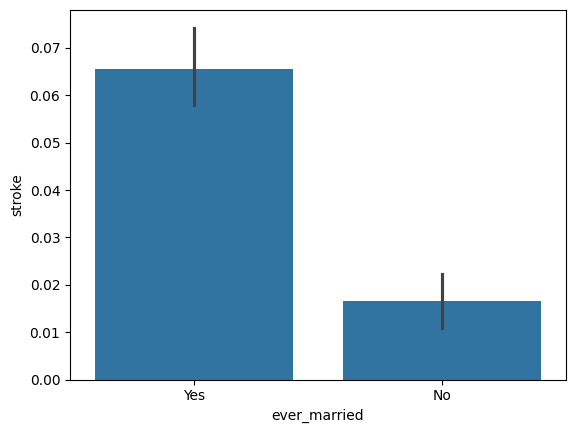

private->0,Self-employed->1,Govt_job->2,children->3,Never_worked->4


'formerly smoked'->1, 'never smoked'->0, 'smokes'->2, 'Unknown'->3:


score for ExtraTreesClassifier on train data:1.0
score for RandomForestClassifier on train data:1.0
score for XGBClassifier on train data:0.9963991769547325
score for GradientBoostingClassifier on train data:1.0
score for ExtraTreesClassifier on test data:0.9958847736625515
score for RandomForestClassifier on test data:0.9876543209876543
score for XGBClassifier on test data:0.9753086419753086
score for GradientBoostingClassifier on test data:0.9902263374485597
Report:ExtraTreesClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       992
           1       0.99      1.00      1.00       952

    accuracy                           1.00      1944
   macro avg       1.00      1.00      1.00      1944
weighted avg       1.00      1.00      1.00      1944

Report:RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       992
           1       0.98      1.00      0.

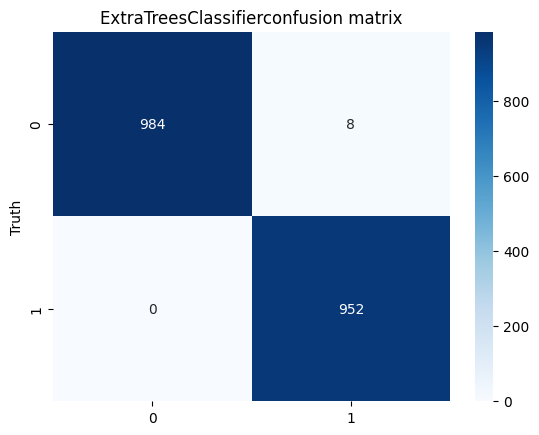

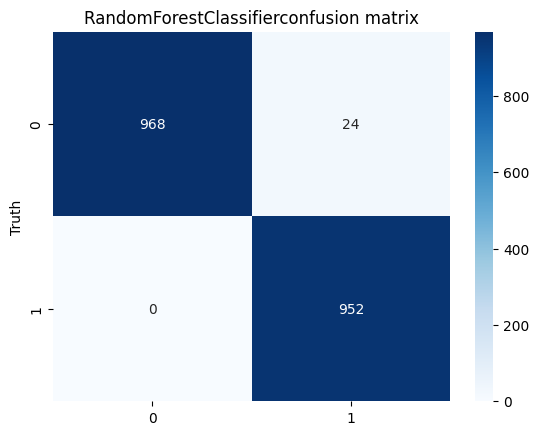

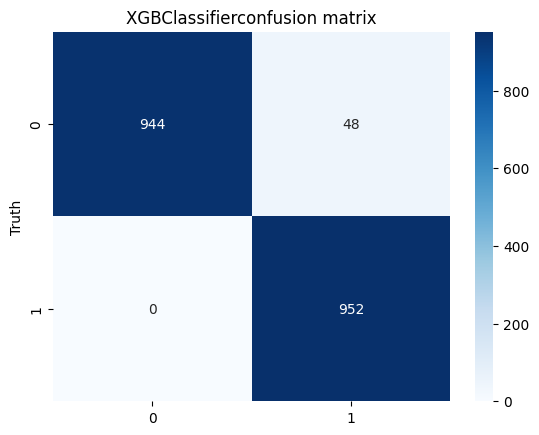

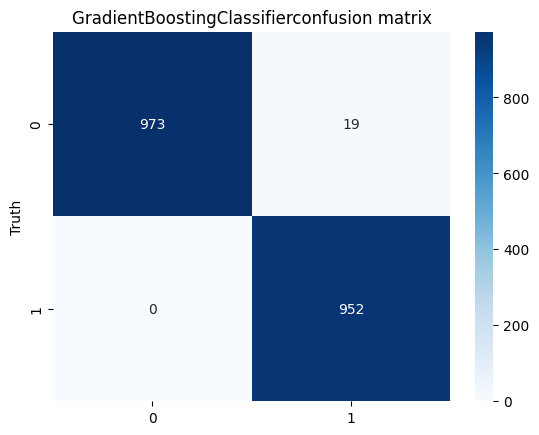

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.describe()
#finding data's size:
data.shape

#pre-processing the data:

#finding null columns:
data.isnull().sum()
#found only bmi is having null values and it is a important factor:
#looking over each row:
#removing id column since of no use the same work can be done with inder too:
data2=data.drop('id',axis=1)
data2.head()

#Adding extra column to group by age:
data2["age_group"]=data["age"].apply(lambda x: "Infant" if (x>=0) and (x<=2)
                                                       else ('child' if (x>=2) and (x<=12)
                                                       else("Adolescent" if (x>12) and (x<=18)
                                                       else ("Young Adults" if (x>19) and (x<=35)
                                                       else ("Adults" if (x>35) and (x<=60)
                                                       else("Old Aged"))))) )
#filling  rows with maen value where the bmi column is null:

data2['bmi']=data2['bmi'].fillna(data2.groupby(["gender","ever_married","age_group"])['bmi'].transform("mean"))
print(data2.head())
#since only 1 row has others data:
data2=data2.drop(data2[data2['gender']=='Other'].index)
#1)gender vs stroke:
fig1 = px.bar(data2, x='gender', y='stroke', color='gender', title='gender vs stroke')
fig1.show()
print("male -> 0\nfemale-> 1:")
# 2) age vs stroke:
fig2 = px.scatter(data2, x='age', y='stroke', color='age', title='age vs stroke')
fig2.show()
fig2.show()

#3)hypertension vs stroke:
fig3=px.bar(data2,x='hypertension',y='stroke',color='hypertension',title='hypertension vs stroke')
fig3.show()

#4)heart_disease vs stroke:
fig4=px.bar(data2,x='heart_disease',y='stroke',color='heart_disease',title='heart disease vs stroke')
fig4.show()

#5)ever_married vs stroke:
fig5=sns.barplot(x='ever_married',y='stroke',data=data2)
plt.show()

#6)work_type vs stroke:
fig6=px.pie(data2,values='stroke',names='work_type',title='work type vs stroke')
print("private->0,Self-employed->1,Govt_job->2,children->3,Never_worked->4")
fig6.show()

#7)Residence_type vs stroke:
fig7=px.bar(data2,x='Residence_type',y='stroke',color='Residence_type')
fig7.show()

#8)avg_glucose_level vs stroke:
fig8=px.scatter(data2,x='avg_glucose_level',y='stroke',color='avg_glucose_level')
fig8.show()

#9)bmi vs stroke:
fig9=px.scatter(data2,x='bmi',y='stroke',color='bmi')
fig9.show()

#10)smoking_status;
print("'formerly smoked'->1, 'never smoked'->0, 'smokes'->2, 'Unknown'->3:")
fig10=px.pie(data2,values='stroke',names='smoking_status',color='smoking_status')
fig10.show()

#libraries for ml:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import resample

#CORRELATION BETWEEN DATA ATTRIBUTES:
corr_data=data2.copy()
encoder=LabelEncoder()
for col in corr_data.select_dtypes(include='object').columns:
  corr_data[col]=encoder.fit_transform(corr_data[col])
corr_data.head()

#unsampling the data:deals in class imbalance by adding data
had_stroke=corr_data[corr_data["stroke"]==1]
no_stroke=corr_data[corr_data["stroke"]==0]
upsampled_had_stroke=resample(had_stroke,replace=True,n_samples=no_stroke.shape[0],random_state=123)
upsampled_data=pd.concat([no_stroke,upsampled_had_stroke])

#normalizinng the dtaa using min max scaler
scaler=MinMaxScaler()
for col in ['age','avg_glucose_level','bmi']:
  scaler.fit(data3[[col]])
  data3[col]=scaler.transform(data3[[col]])

data3
# #now diving the data set for training and testing:
# from sklearn.model_selection import train_test_split
x=data3.drop('stroke',axis=1)
y=data3['stroke']
x_train,x_test,y_train,y_test=train_test_split(data3.drop('stroke',axis=1),data3['stroke'],test_size=0.2,random_state=42)
# # print(x_train.shape)
# # print(x_test.shape)
# # print(y_train.shape)
# # print(y_test.shape)
#defining models:
etc_model=ExtraTreesClassifier()
rfc_model=RandomForestClassifier(n_estimators=29,max_leaf_nodes=900,max_features=0.8,criterion='entropy')
xgb_model=XGBClassifier(objective="binary:logistic",eval_metric="auc")
gbc_model=GradientBoostingClassifier(max_depth=29,min_samples_leaf=4,min_samples_split=13,subsample=0.8)

models=[etc_model,rfc_model,xgb_model,gbc_model]

#training models& evaluating:
for model in models:
  model.fit(x_train,y_train)

for model in models:
  model_name=type(model).__name__
  print(f"score for {model_name} on train data:{model.score(x_train,y_train)}")

for model in models:
  model_name=type(model).__name__
  print(f"score for {model_name} on test data:{model.score(x_test,y_test)}")

#classification report:
for model in models:
  y_predicted=model.predict(x_test)
  model_name=type(model).__name__
  print(f"Report:{model_name}")
  print(classification_report(y_test,y_predicted))

#confusion metrices:
for model in models:
  model_name=type(model).__name__
  y_predicted=model.predict(x_test)
  cm=confusion_matrix(y_test,y_predicted)
  sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
  plt.xlabel=("Predicted")
  plt.ylabel("Truth")
  plt.title(f"{model_name}confusion matrix")
  plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Drop irrelevant columns
df.drop(['id'], axis=1, inplace=True)

# Handle missing values (fill with mean for BMI)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


<ipython-input-2-7367b00e1ba5>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9055 - loss: 0.3817 - val_accuracy: 0.9548 - val_loss: 0.1800
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9576 - loss: 0.1668 - val_accuracy: 0.9548 - val_loss: 0.1676
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9546 - loss: 0.1650 - val_accuracy: 0.9548 - val_loss: 0.1639
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9551 - loss: 0.1594 - val_accuracy: 0.9548 - val_loss: 0.1609
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1513 - val_accuracy: 0.9548 - val_loss: 0.1578
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9564 - loss: 0.1455 - val_accuracy: 0.9548 - val_loss: 0.1574
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9584 - loss: 0.1482 - val_accuracy: 0.9535 - val_loss: 0.1556
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1466 - val_accuracy: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

data=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.describe()
#finding data's size:
data.shape

#pre-processing the data:

#finding null columns:
data.isnull().sum()
#found only bmi is having null values and it is a important factor:
#looking over each row:
#removing id column since of no use the same work can be done with inder too:
data2=data.drop('id',axis=1)
data2.head()

#Adding extra column to group by age:
data2["age_group"]=data["age"].apply(lambda x: "Infant" if (x>=0) and (x<=2)
                                                       else ('child' if (x>=2) and (x<=12)
                                                       else("Adolescent" if (x>12) and (x<=18)
                                                       else ("Young Adults" if (x>19) and (x<=35)
                                                       else ("Adults" if (x>35) and (x<=60)
                                                       else("Old Aged"))))) )
#filling  rows with maen value where the bmi column is null:

data2['bmi']=data2['bmi'].fillna(data2.groupby(["gender","ever_married","age_group"])['bmi'].transform("mean"))
print(data2.head())
#since only 1 row has others data:
data2=data2.drop(data2[data2['gender']=='Other'].index)
#filling  rows with maen value where the bmi column is null:
# Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build improved neural network
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(16, activation='relu'),
    # Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


<ipython-input-4-96e22b3d9a92>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6383 - loss: 0.6174 - val_accuracy: 0.7873 - val_loss: 0.4688
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7509 - loss: 0.5020 - val_accuracy: 0.7950 - val_loss: 0.4452
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7916 - loss: 0.4619 - val_accuracy: 0.8001 - val_loss: 0.4359
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7944 - loss: 0.4519 - val_accuracy: 0.8027 - val_loss: 0.4272
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4460 - val_accuracy: 0.8046 - val_loss: 0.4208
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8077 - loss: 0.4350 - val_accuracy: 0.8040 - val_loss: 0.4160
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8090 - loss: 0.4230 - val_accuracy: 0.8111 - val_loss: 0.4131
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8122 - loss: 0.4182 - val_accu